#### Implementação do K-Means

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
#Load Data

url = "lib/heart/heart.csv"
url = 'https://drive.google.com/file/d/1E7aR22Wvi3_5am44ARFAvMTWmXtsFjO2/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# loading dataset into Pandas DataFrame
df = pd.read_csv(path)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# obter apenas os valores 
features = df.columns[:-1] ## Retirada do Resultado                     
x = df.loc[:, features].values
y = df.loc[:,'target'].values

In [21]:
## Dividindo o dataset
train_features, test_features, train_targets, test_targets = train_test_split(
    x                       ## Array de Features
    , y                     ## Array de Targets
    , test_size = 0.2       ## Percentual do Conjunto de Testes
    , random_state = 123    ## Estado de Random - Serve para manter os valores 
    , stratify = y)         ## Manter proporção de valores da saída do treino similar a saída dos testes

In [22]:
#   Accuracy tells you how many times the ML model was correct overall. 
#   Precision is how good the model is at predicting a specific category. 
#   Recall tells you how many times the model was able to detect a specific category.

In [98]:
def buildMPLPerceptron(train_features, test_features, train_targets, test_targets
, num_neurons = 2, activation_function = 'relu', optimization_function = 'sgd'
, learning = 'invscaling', alp = 0.0001, show_text = False, iter = 40):

    global classifier
    classifier = MLPClassifier(
        hidden_layer_sizes = num_neurons
        , max_iter = iter
        , activation = activation_function
        , solver = optimization_function
        , verbose = show_text
        , random_state= 457
        , learning_rate = learning
        , learning_rate_init = alp
        )
        
    classifier.fit(train_features, train_targets)
    predictions = classifier.predict(test_features)
    
    accuracy = accuracy_score(test_targets, predictions)
    precision = precision_score(test_targets, predictions)
    recall = recall_score(test_targets, predictions)

    return np.round(accuracy,4), np.round(precision,4), np.round(recall,4)

In [103]:
score = buildMPLPerceptron(train_features, test_features, train_targets, test_targets
, show_text = False)
print(f'Accuracy: {score[0]*100}% \nPrecision: {score[1]*100}% \nRecall: {score[2]}')

Accuracy: 65.57% 
Precision: 64.29% 
Recall: 0.8182


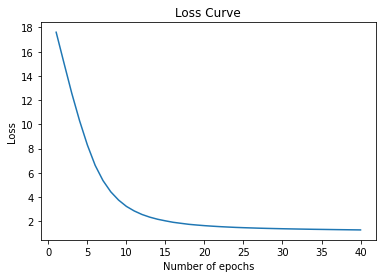

In [104]:
### Curva do resultado da função de perda

model = classifier.fit(train_features, train_targets)

plt.plot(range(1, model.n_iter_ + 1), model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

In [25]:
## Variando o número de neurônios

scores_dict = dict()
for i in range(1 , 15):
    score = buildMPLPerceptron(train_features, test_features, train_targets, test_targets, num_neurons = i)
    scores_dict[i] = score

In [26]:
scores_dict

{1: (0.541, 0.541, 1.0),
 2: (0.541, 0.541, 1.0),
 3: (0.459, 0.0, 0.0),
 4: (0.459, 0.0, 0.0),
 5: (0.5574, 0.55, 1.0),
 6: (0.541, 0.541, 1.0),
 7: (0.6393, 0.6774, 0.6364),
 8: (0.541, 0.541, 1.0),
 9: (0.541, 0.541, 1.0),
 10: (0.541, 0.541, 1.0),
 11: (0.4754, 0.5185, 0.4242),
 12: (0.623, 0.6471, 0.6667),
 13: (0.6721, 0.8095, 0.5152),
 14: (0.541, 0.551, 0.8182)}

In [38]:
max_idx = max(scores_dict, key= lambda x: scores_dict[x][0])
print(f"""
    Melhor resultado com {max_idx} neurônios
    Accuracy: {round(scores_dict[max_idx][0]*100 , 2)}%
    Precision: {round(scores_dict[max_idx][1]*100 , 2)}%
    Recall: {scores_dict[max_idx][2]}
""")


    Melhor resultado com 13 neurônios. 
    Accuracy: 67.21%
    Precision: 80.95%
    Recall: 0.5152



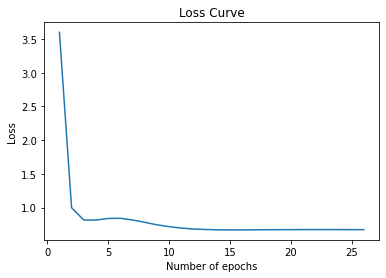

In [71]:
### Curva do resultado da função de perda

buildMPLPerceptron(train_features, test_features, train_targets, test_targets, num_neurons = 13)

model = classifier.fit(train_features, train_targets)

plt.plot(range(1, model.n_iter_ + 1), model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

In [74]:
# activation{'identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
## Testar diferentes Funções de Ativação
activation = ['identity', 'logistic', 'tanh', 'relu']
scores_dict = dict()
for act in activation:
    score = buildMPLPerceptron(train_features, test_features, train_targets, test_targets, activation_function = act)
    scores_dict[act] = score


In [75]:
scores_dict

{'identity': (0.4262, 0.4792, 0.697),
 'logistic': (0.541, 0.541, 1.0),
 'tanh': (0.459, 0.0, 0.0),
 'relu': (0.541, 0.541, 1.0)}

In [76]:
max_idx = max(scores_dict, key= lambda x: scores_dict[x][0])
print(f"""
    Melhor resultado com função de ativação {max_idx}
    Accuracy: {round(scores_dict[max_idx][0]*100 , 2)}%
    Precision: {round(scores_dict[max_idx][1]*100 , 2)}%
    Recall: {scores_dict[max_idx][2]}
""")


    Melhor resultado com função de ativação logistic
    Accuracy: 54.1%
    Precision: 54.1%
    Recall: 1.0



In [78]:
## Variando o alpha
alpha = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
scores_dict = dict()
for a in alpha:
    score = buildMPLPerceptron(train_features, test_features, train_targets, test_targets, alp = a)
    scores_dict[a] = score

In [101]:
scores_dict

{1: (0.541, 0.541, 1.0),
 0.5: (0.541, 0.541, 1.0),
 0.1: (0.541, 0.541, 1.0),
 0.05: (0.541, 0.541, 1.0),
 0.01: (0.541, 0.541, 1.0),
 0.005: (0.541, 0.541, 1.0),
 0.001: (0.541, 0.541, 1.0),
 0.0005: (0.541, 0.541, 1.0),
 0.0001: (0.6557, 0.6429, 0.8182)}

In [80]:
max_idx = max(scores_dict, key= lambda x: scores_dict[x][0])
print(f"""
    Melhor resultado com alpha {max_idx}
    Accuracy: {round(scores_dict[max_idx][0]*100 , 2)}%
    Precision: {round(scores_dict[max_idx][1]*100 , 2)}%
    Recall: {scores_dict[max_idx][2]}
""")


    Melhor resultado com alpha 0.0001
    Accuracy: 65.57%
    Precision: 64.29%
    Recall: 0.8182



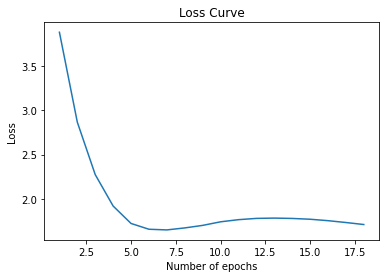

In [100]:
### Curva do resultado da função de perda
# The loss function is the function that computes the distance between the current output 
# of the algorithm and the expected output

buildMPLPerceptron(train_features, test_features, train_targets, test_targets, alp = 0.0001, num_neurons=13, iter = 500)

model = classifier.fit(train_features, train_targets)

plt.plot(range(1, model.n_iter_ + 1), model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()